In [205]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [206]:
N_GRAPH = 100

In [207]:
def get_xs(xl, xr, n):
    if n == 1:
        return np.array([xl])
    s = (xr - xl) / (n - 1)
    return np.arange(xl, xr + 10 ** -9, s)

In [208]:
def get_diff(xs, f1, f2):
    return list(map(lambda x: abs(f1(x) - f2(x)), xs))

In [209]:
def draw(xs, ys, names=None):
    if type(xs) is not list:
        xs = [xs]
        ys = [ys]
        if names is not None:
            names = [names]
            
    n = len(xs)
    for i in range(n):
        plt.plot(xs[i], ys[i])
        
    if names is not None:
        plt.legend(names)
    plt.show()

In [210]:
def u(x):
    return np.e / (1 - np.e ** 2) * (np.e ** x - np.e ** -x) + x

In [211]:
def get_A(n):
    h = 1 / (n + 1)
    A = np.zeros((n, n))
    i, j = np.indices(A.shape)
    A[i == j + 1] = -h ** (-2)
    A[i == j] = 2 * h ** (-2) + 1
    A[i == j - 1] = -h ** (-2)
    return A

def get_b(n):
    h = 1 / (n + 1)
    return np.arange(1, n + 1, 1) * h

In [212]:
def solve(n):
    A = get_A(n)
    b = get_b(n)
    return np.linalg.solve(A, b)

def get_errors(n):
    h = 1 / (n + 1)
    xs = get_xs(h, n * h, n)
    ys = solve(n)
    return get_diff(list(range(n)),
            lambda i: u(xs[i]),
            lambda i: ys[i])

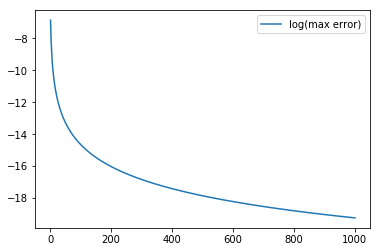

In [213]:
n_from = 1
n_to = 1000

ns = list(range(n_from, n_to + 1))
errors = list(map(lambda n: max(get_errors(n)), ns))

ns = np.array(ns)
errors = np.array(errors)

errors = np.log(errors)

draw(ns, errors, "log(max error)")

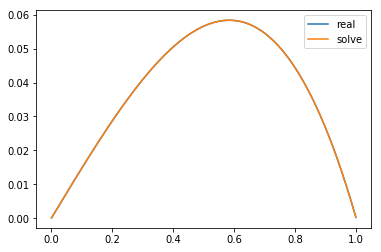

In [214]:
n = 1000

h = 1 / (n + 1)
xs = get_xs(h, n * h, n)
ys_real = list(map(u, xs))
ys_solve = solve(n).tolist()

xs = [xs] * 2
ys = [ys_real, ys_solve]
names = ["real", "solve"]
draw(xs, ys, names)

In [215]:
def tridiag(mA, vb):
    n = len(vb)
    a = [0] + [-mA[i + 1][i] for i in range(n - 1)]
    c = [mA[i][i] for i in range(n)]
    b = [-mA[i - 1][i] for i in range(1, n)]
    
    if n == 1:
        return [vb[0] / c[0]]
    
    aa = [b[0] / c[0]]
    for i in range(1, n - 1):
        aa.append(b[i] / (c[i] - aa[i - 1] * a[i]))
    
    ab = [vb[0] / c[0]]
    for i in range(1, n):
        ab.append((vb[i] + ab[i - 1] * a[i]) / (c[i] - aa[i - 1] * a[i]))
        
    res = ab.copy()
    for k in reversed(range(0, n - 1)):
        res[k] += aa[k] * res[k + 1]
        
    return res

def solve_tridiag(n):
    A = get_A(n)
    b = get_b(n)
    return tridiag(A, b)

In [216]:
def get_time(solve_method, A, b):
    t = time.time()
    solve_method(A, b)
    return time.time() - t

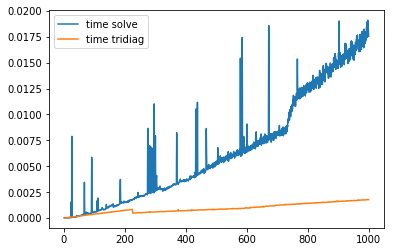

In [217]:
n_from = 1
n_to = 1000

ns = list(range(n_from, n_to + 1))
time_solve = list(map(lambda n: get_time(np.linalg.solve, get_A(n), get_b(n)), ns))
time_tridiag = list(map(lambda n: get_time(tridiag, get_A(n), get_b(n)), ns))

ns = [ns] * 2
times = [time_solve, time_tridiag]
names = ["time solve", "time tridiag"]

times = np.array(times)

draw(ns, times, names)